# **Dhruv Karmokar**
# **21BAI1604**

# Simple Linear Regression

# Importing Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Create our own data

In [11]:
datafile = pd.DataFrame()
datafile[0] = np.arange(0, 20)
datafile[1] = [150, 154, 162, 178, 165, 169, 172, 177, 185, 198, 175, 180, 182, 185, 188, 175, 190, 193, 195, 199]
datafile.columns=['Time','Speed']
datafile

,Time,Speed
0,0,150
1,1,154
2,2,162
3,3,178
4,4,165
5,5,169
6,6,172
7,7,177
8,8,185
9,9,198


# Checking linearity

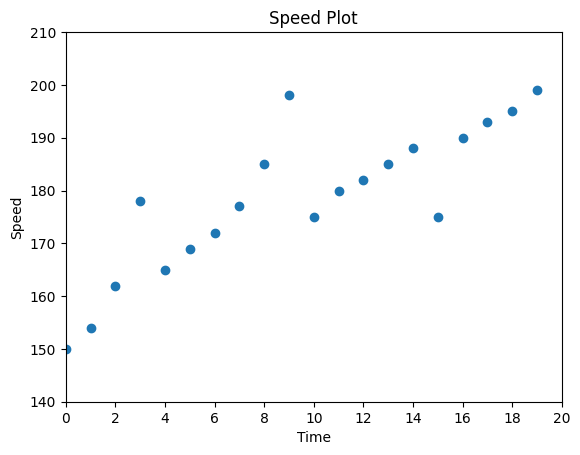

In [15]:
plt.scatter(datafile['Time'], datafile['Speed'])
plt.title("Speed Plot")
plt.xlim(0, 20)
plt.ylim(140, 210)
plt.xticks(np.arange(0, 21, 2))
plt.xlabel("Time")
plt.ylabel("Speed")
plt.show()

<Axes: >

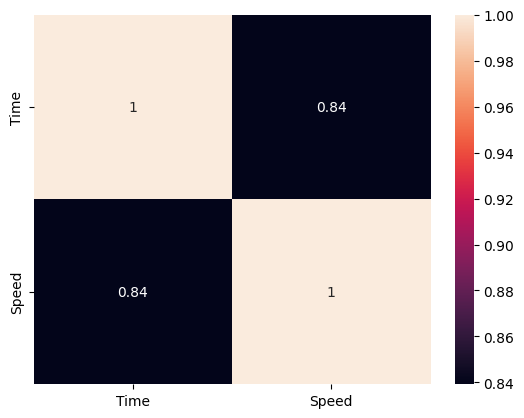

In [16]:
import seaborn as sb
data_corr=datafile.corr()
sb.heatmap(data_corr,annot=True)

In [18]:
from sklearn import linear_model
regress=linear_model.LinearRegression()
train_x=np.asanyarray(datafile[['Time']])
train_y=np.asanyarray(datafile[['Speed']])
#print(train_x)
#print(train_y)
regress.fit(train_x,train_y)
#The coefficients
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)


Coefficients: [[1.96090226]]
Intercept: [159.97142857]


# Plotoutputs

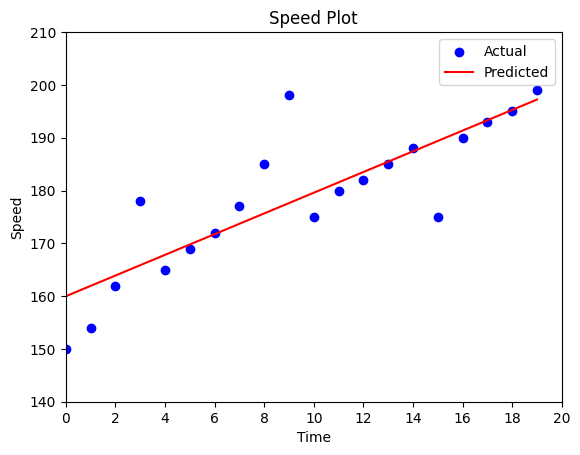

In [20]:
plt.scatter(datafile.Time, datafile.Speed, color='blue', label="Actual")
plt.plot(train_x, regress.coef_[0] * train_x + regress.intercept_, '-r', label="Predicted")
plt.title("Speed Plot")
plt.xlim(0, 20)
plt.ylim(140, 210)
plt.xticks(np.arange(0, 21, 2))
plt.legend()
plt.xlabel("Time")
plt.ylabel("Speed")
plt.show()

In [24]:
y_predicted = regress.predict(train_x)

for i in range(len(train_x)):
    print(train_y[i], y_predicted[i])

datafile['Predicted'] = y_predicted

print(datafile.head())

datafile.to_csv('/content/Speed.csv', index=False)


[150] [159.97142857]
[154] [161.93233083]
[162] [163.89323308]
[178] [165.85413534]
[165] [167.81503759]
[169] [169.77593985]
[172] [171.73684211]
[177] [173.69774436]
[185] [175.65864662]
[198] [177.61954887]
[175] [179.58045113]
[180] [181.54135338]
[182] [183.50225564]
[185] [185.46315789]
[188] [187.42406015]
[175] [189.38496241]
[190] [191.34586466]
[193] [193.30676692]
[195] [195.26766917]
[199] [197.22857143]
   Time  Speed   Predicted
0     0    150  159.971429
1     1    154  161.932331
2     2    162  163.893233
3     3    178  165.854135
4     4    165  167.815038


# Performance Measurement

# Any of the following metrics can be used
1) Mean Absolute error
2) Mean Squared error
3) Root Mean Squared error
4) R-Square (not error)

In [25]:
from sklearn import metrics
print('Mean Absolute error ', metrics.mean_absolute_error(train_y,y_predicted))
print('Mean Squared error ', metrics.mean_squared_error(train_y,y_predicted))
print('Root Mean Squared error ', np.sqrt(metrics.mean_squared_error(train_y,y_predicted)))

Mean Absolute error  4.778045112781953
Mean Squared error  53.68917293233083
Root Mean Squared error  7.327289603416179


In [26]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(datafile[['Time']])
test_y=np.asanyarray(datafile[['Speed']])
test_y_predicted=regress.predict(test_x)
print('Mean Absolute error (MAE)', np.mean(np.absolute(test_y_predicted-test_y)))
print('Mean Squared error (MSE)', np.mean(test_y_predicted-test_y)**2)
print('R2 score:%0.2f ', r2_score(test_y,test_y_predicted))


Mean Absolute error (MAE) 4.778045112781953
Mean Squared error (MSE) 3.231174267785265e-29
R2 score:%0.2f  0.7042570621773117


# Using Training and Testing Data

In [27]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(datafile[['Time']],datafile[['Speed']],test_size=0.30)
print(train_x)
print("Testing")
print(test_x)

from sklearn import linear_model
regress=linear_model.LinearRegression()
regress.fit(train_x,train_y)
#The coefficients
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)



    Time
10    10
0      0
19    19
2      2
6      6
7      7
15    15
12    12
14    14
17    17
16    16
3      3
13    13
5      5
Testing
    Time
11    11
18    18
4      4
9      9
1      1
8      8
Coefficients: [[1.86407336]]
Intercept: [159.70670019]


In [28]:
y_predicted=regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)


    Time
11    11
18    18
4      4
9      9
1      1
8      8
    Speed
11    180
18    195
4     165
9     198
1     154
8     185
[[180.21150717]
 [193.26002071]
 [167.16299364]
 [176.48336045]
 [161.57077355]
 [174.61928709]]


In [29]:
from sklearn import metrics
print('Mean Absolute error ', metrics.mean_absolute_error(test_y,y_predicted))
print('Mean Squared error ', metrics.mean_squared_error(test_y,y_predicted))
print('Root Mean Squared error ', np.sqrt(metrics.mean_squared_error(test_y,y_predicted)))


Mean Absolute error  7.263767687225761
Mean Squared error  105.96539917131626
Root Mean Squared error  10.293949639050906


In [31]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(regress,datafile[['Time']],datafile[['Speed']],cv=5,scoring='r2')
print(accuracy)

[ 0.01391869  0.74117645 -1.07107932 -2.08860899  0.87818299]
